# **Setup**

In [14]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import keras

# **Load Dataset**

In [15]:
(x_train,y_train),(x_test,y_test) = keras.datasets.cifar10.load_data()

In [16]:
print('Train Date: ',x_train.shape,y_train.shape)
print('Test Date: ',x_test.shape,y_test.shape)

Train Date:  (50000, 32, 32, 3) (50000, 1)
Test Date:  (10000, 32, 32, 3) (10000, 1)


## **Reshape Labels**

In [32]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [33]:
y_train = y_train.reshape(-1,)
y_test = y_test.reshape(-1,)

print(y_train.shape)

(50000,)


In [34]:
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

## **Category Labels**

In [18]:
category_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(category_names)

category_names_dict = dict(zip(range(len(category_names)),category_names))
print(category_names_dict)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer', 5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'}


In [19]:
category_names_dict

{0: 'airplane',
 1: 'automobile',
 2: 'bird',
 3: 'cat',
 4: 'deer',
 5: 'dog',
 6: 'frog',
 7: 'horse',
 8: 'ship',
 9: 'truck'}

In [24]:
x_test.shape

(10000, 32, 32, 3)

IndexError: boolean index did not match indexed array along dimension 1; dimension is 32 but corresponding boolean dimension is 1

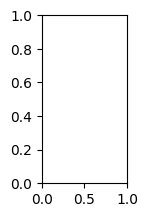

In [20]:
for i in range(10):
    plt.subplot(2,5,i+1)
    image_array = x_test[y_test==i][0]
    plt.imshow(image_array)
    plt.title(category_names_dict[i])

plt.tight_layout()    

# **Data Exploration**

[6]
[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


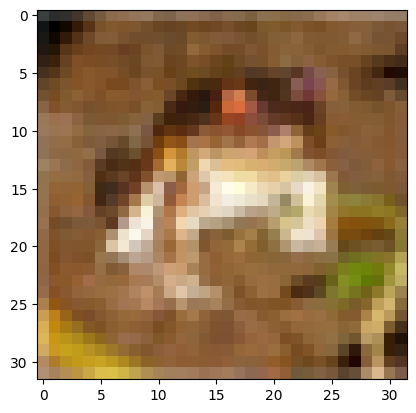

In [25]:
print(y_train[0])
print(x_train[0])
plt.imshow(x_train[0])
plt.show()

# **Data Model**

In [46]:
from keras.layers import Input, Dense, Flatten, Rescaling, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.models import Sequential

## **Model 01 - ANN**

In [29]:
# Creat Model
Model = Sequential()
Model.add(Rescaling(1./255, input_shape=(32,32,3)))
Model.add(Flatten())
Model.add(Dense(units=512, activation='relu'))
Model.add(Dense(units=256, activation='relu'))
Model.add(Dense(units=128, activation='relu'))
Model.add(Dense(units=64, activation='relu'))
Model.add(Dense(units=32, activation='relu'))
Model.add(Dense(units=10, activation='sigmoid'))
# Model.summary()

# Compile Model
Model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train Model
Model.fit(x_train, y_train, epochs=5)

# Predict Test Data
y_pred = Model.predict(x_test)

# Model Evaluation
Model.evaluate(x_test, y_test) # Loss & Metrics

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.2552 - loss: 2.0244
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3740 - loss: 1.7426
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4083 - loss: 1.6480
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4272 - loss: 1.5961
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4464 - loss: 1.5425
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4603 - loss: 1.5357


[1.5386759042739868, 0.4575999975204468]

### **Visualize Model**

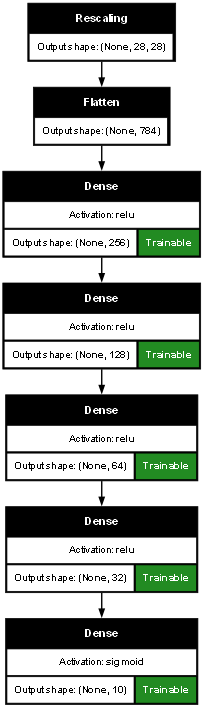

In [ ]:
from IPython.display import Image

# keras.utils.plot_model(Model,to_file='Model_Architecture.png',show_shapes=True)
# Image('Model_Architecture.png')

keras.utils.plot_model(Model, show_shapes=True,show_layer_activations=True,show_trainable=True,dpi=50)

### **Visualize Predictions**

In [35]:
y_pred[:5]

array([[0.66188365, 0.7582271 , 0.7030764 , 0.97518307, 0.7850128 ,
        0.9512263 , 0.8283876 , 0.5672999 , 0.85125375, 0.3504252 ],
       [0.8869644 , 0.9333898 , 0.16288695, 0.09606543, 0.12835498,
        0.07206056, 0.02474695, 0.47882494, 0.9216521 , 0.9669043 ],
       [0.9430134 , 0.9289149 , 0.287292  , 0.14016151, 0.17343229,
        0.20904279, 0.0215259 , 0.37068462, 0.9806193 , 0.8911913 ],
       [0.86487764, 0.391671  , 0.76653284, 0.32370478, 0.68197954,
        0.26452714, 0.06506742, 0.41664782, 0.88585705, 0.41108778],
       [0.37470034, 0.1768062 , 0.92407554, 0.8410349 , 0.98622125,
        0.8209589 , 0.9501908 , 0.64198434, 0.08219585, 0.05993988]],
      dtype=float32)

In [36]:
y_pred_labels = [np.argmax(pred) for pred in y_pred]
y_pred_labels[:5]

[3, 9, 8, 8, 4]

In [37]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [38]:
tf.math.confusion_matrix(y_test, y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[536,  20,  58,  18,  41,  15,  22,  88, 168,  34],
       [ 60, 547,   3,  21,  20,  10,  19,  55, 105, 160],
       [ 88,  24, 189, 103, 242,  50, 128, 128,  32,  16],
       [ 38,  26,  56, 293,  77, 154, 134, 129,  44,  49],
       [ 58,  10,  73,  64, 445,  31, 128, 149,  31,  11],
       [ 31,  24,  54, 177,  75, 286, 107, 164,  58,  24],
       [  6,  18,  44,  96, 162,  61, 506,  73,  17,  17],
       [ 41,  20,  31,  38, 114,  29,  32, 639,  21,  35],
       [132,  61,  17,  23,  20,  13,  10,  18, 646,  60],
       [ 56, 175,   9,  32,  10,   9,  26, 100,  94, 489]])>

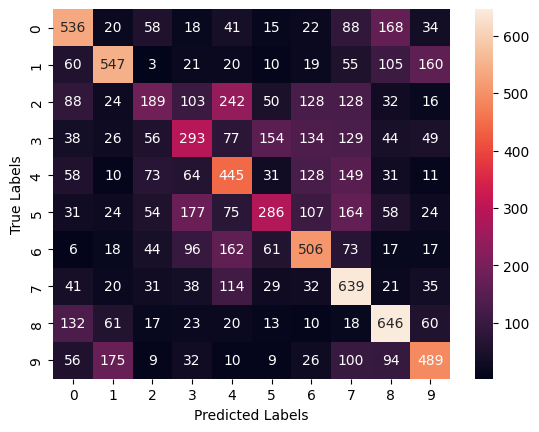

In [39]:
sns.heatmap(tf.math.confusion_matrix(y_test, y_pred_labels),annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Performance Evaluation**

In [41]:
from sklearn.metrics import confusion_matrix,classification_report

print('Classification Report: ',classification_report(y_test,y_pred_labels))

Classification Report:                precision    recall  f1-score   support

           0       0.51      0.54      0.52      1000
           1       0.59      0.55      0.57      1000
           2       0.35      0.19      0.25      1000
           3       0.34      0.29      0.31      1000
           4       0.37      0.45      0.40      1000
           5       0.43      0.29      0.34      1000
           6       0.46      0.51      0.48      1000
           7       0.41      0.64      0.50      1000
           8       0.53      0.65      0.58      1000
           9       0.55      0.49      0.52      1000

    accuracy                           0.46     10000
   macro avg       0.45      0.46      0.45     10000
weighted avg       0.45      0.46      0.45     10000



## **Model 02 - CNN**

In [53]:
# Creat Model_02
Model_02 = Sequential()
Model_02.add(Rescaling(1./255, input_shape=(32,32,3)))

Model_02.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu'))
Model_02.add(MaxPooling2D(pool_size=(2,2)))

Model_02.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
Model_02.add(MaxPooling2D(pool_size=(2,2)))

Model_02.add(Flatten())
Model_02.add(Dense(units=64, activation='relu'))
Model_02.add(Dense(units=32, activation='relu'))
Model_02.add(Dense(units=10, activation='softmax')) # Use softmax instead of sigmoid
# Model_02.summary()

# Compile Model_02
Model_02.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

# Train Model_02
Model_02.fit(x_train, y_train, epochs=10)

# Predict Test Data
y_pred = Model_02.predict(x_test)

# Model_02 Evaluation
Model_02.evaluate(x_test, y_test) # Loss & Metrics

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.3727 - loss: 1.7177
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5905 - loss: 1.1489
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6506 - loss: 0.9919
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.6880 - loss: 0.9027
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7115 - loss: 0.8262
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7290 - loss: 0.7753
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7504 - loss: 0.7224
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7646 - loss: 0.6723
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.7813 - loss: 0.6283
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7921 - loss: 0.5940
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7011 - loss: 0.9229


[0.9211787581443787, 0.6996999979019165]

### **Visualize Predictions**

In [54]:
y_pred[:5]

array([[3.0044687e-03, 4.1403819e-05, 2.3088045e-03, 1.3261919e-01,
        3.3772903e-05, 3.1654052e-03, 9.9401479e-04, 5.4136734e-05,
        8.5702318e-01, 7.5556792e-04],
       [2.4851400e-04, 2.0229952e-01, 1.2268978e-06, 2.7601158e-05,
        3.4201011e-07, 3.1142392e-07, 1.2976864e-06, 1.1453736e-08,
        7.9677111e-01, 6.5001065e-04],
       [3.7241265e-02, 7.6554614e-01, 1.4367226e-03, 9.4999885e-03,
        6.0445030e-04, 4.8542162e-04, 7.2960427e-04, 3.4138074e-04,
        1.6716495e-01, 1.6950058e-02],
       [7.0400381e-01, 5.0185309e-03, 3.8736153e-02, 1.8236871e-03,
        3.2140866e-02, 8.5332402e-04, 2.4459942e-04, 7.6191145e-04,
        2.1379279e-01, 2.6243527e-03],
       [4.0473105e-06, 1.3056819e-05, 1.1566767e-02, 1.4506470e-02,
        4.4826078e-01, 9.1718434e-04, 5.2466309e-01, 1.2294961e-06,
        6.4899781e-05, 2.4948886e-06]], dtype=float32)

In [55]:
y_pred_labels = [np.argmax(pred) for pred in y_pred]
y_pred_labels[:5]

[8, 8, 1, 0, 6]

In [58]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

In [59]:
tf.math.confusion_matrix(y_test, y_pred_labels)

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[720,  13,  33,  28,  16,   7,  17,   7,  89,  70],
       [ 11, 772,   5,  10,   4,   6,  11,   2,  26, 153],
       [ 69,   7, 493,  96, 112,  71,  82,  31,  24,  15],
       [ 25,   7,  44, 566,  59, 132,  75,  35,  24,  33],
       [ 33,   1,  54,  78, 673,  26,  43,  67,  15,  10],
       [ 15,   4,  37, 218,  50, 580,  30,  40,   6,  20],
       [  8,   3,  26,  78,  51,  14, 791,   5,   7,  17],
       [ 18,   5,  20,  61,  65,  63,   5, 714,   7,  42],
       [ 52,  27,   6,  14,   3,   8,  12,   5, 831,  42],
       [ 25,  43,   7,  14,   4,   2,  12,   4,  32, 857]])>

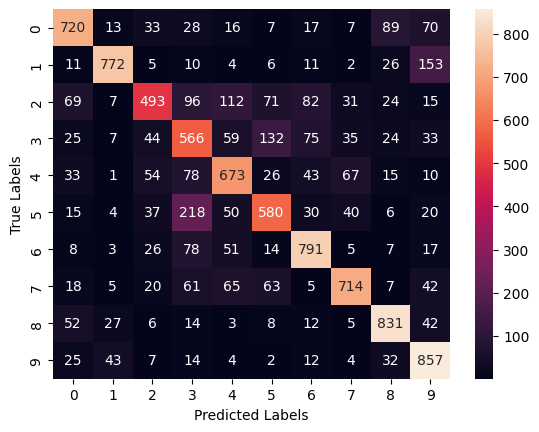

In [60]:
sns.heatmap(tf.math.confusion_matrix(y_test, y_pred_labels),annot=True,fmt='d')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

### **Performance Evaluation**

In [61]:
from sklearn.metrics import confusion_matrix,classification_report

print('Classification Report: ',classification_report(y_test,y_pred_labels))

Classification Report:                precision    recall  f1-score   support

           0       0.74      0.72      0.73      1000
           1       0.88      0.77      0.82      1000
           2       0.68      0.49      0.57      1000
           3       0.49      0.57      0.52      1000
           4       0.65      0.67      0.66      1000
           5       0.64      0.58      0.61      1000
           6       0.73      0.79      0.76      1000
           7       0.78      0.71      0.75      1000
           8       0.78      0.83      0.81      1000
           9       0.68      0.86      0.76      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

